In [1]:
print("Hello, World!")

Hello, World!


Positively and negatively charged particles are saved in the directories positive-charge and negative-charge, respectively. Truth properties of each particle are saved in the labels files, which include columns x-entry, y-entry, z-entry, n_x, n_y, n_z, number_eh_pairs, y-local, pt, cotAlpha, cotBeta, y-midplane, x-midplane.

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt

path = "datasets/recon3D/recon3D_d17301.parquet"

# load parquet with a safe fallback for engine selection
if not os.path.exists(path):
    raise FileNotFoundError(f"Parquet file not found: {path}")

try:
    df = pd.read_parquet(path)
except Exception:
    # try explicit engines if default fails
    try:
        df = pd.read_parquet(path, engine="pyarrow")
    except Exception:
        df = pd.read_parquet(path, engine="fastparquet")

# Basic overview
print("Path:", path)
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())
print("\nDtypes:")
print(df.dtypes)
print("\nMemory usage (bytes):", df.memory_usage(deep=True).sum())

# Quick data peek
print("\nHead:")
print(df.head(10))
print("\nTail:")
print(df.tail(5))

# Info and summaries
print("\nInfo:")
df.info(memory_usage="deep")
print("\nDescribe (numeric):")
print(df.describe(include='number').transpose())
print("\nDescribe (all):")
print(df.describe(include='all').transpose())

# Missing values and uniqueness
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nUnique counts per column:")
print(df.nunique(dropna=False))

# Show top value counts for object/category columns
obj_cols = [c for c, t in df.dtypes.items() if t == "object" or str(t).startswith("category")]
for c in obj_cols:
    print(f"\nTop values for {c}:")
    print(df[c].value_counts(dropna=False).head(10))

# Quick plots for numeric columns (limits to first 6 to avoid overload)
# num_cols = df.select_dtypes(include=["number"]).columns.tolist()[:6]
# if num_cols:
#     ax = df[num_cols].hist(layout=(len(num_cols), 1), figsize=(6, 2 * len(num_cols)), bins=30)
#     plt.tight_layout()
#     plt.show()

# Sample a few random rows
print("\nRandom sample:")
print(df.sample(min(10, len(df)), random_state=1))

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/hep/hl2822/smart-pixels-ml/smart-pixel/lib64/python3.9/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/hep/hl2822/smart-pixels-ml/smart-pixel/lib64/python3.9/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/home/hep/hl2822/smart-pixels-ml/smart-pixel/lib64/python3.9/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
  File "/home/hep/hl2822/smart-pixels-ml/smart-pixel/lib64/python3.9/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
  File "/home/hep/hl2822/smart-pixels-ml/smart-pixel/lib64/python3.9/site-

Path: datasets/recon3D/recon3D_d17301.parquet
Shape: (49997, 5460)

Columns:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '14

Path: datasets/labels/labels_d17301.parquet
Shape: (49997, 13)

Columns:
['x-entry', 'y-entry', 'z-entry', 'n_x', 'n_y', 'n_z', 'number_eh_pairs', 'y-local', 'pt', 'cotAlpha', 'cotBeta', 'y-midplane', 'x-midplane']

Dtypes:
x-entry            float64
y-entry            float64
z-entry            float64
n_x                float64
n_y                float64
n_z                float64
number_eh_pairs    float64
y-local            float64
pt                 float64
cotAlpha           float64
cotBeta            float64
y-midplane         float64
x-midplane         float64
dtype: object

Memory usage (bytes): 5599664

Head:
      x-entry    y-entry  z-entry       n_x       n_y       n_z  \
0    4.198420  21.228418    100.0  0.768970 -0.160933 -0.634940   
1  129.548080  -1.019828    100.0 -1.205132 -0.087774 -0.635886   
2  -51.428604  13.324836    100.0  1.542896 -0.322932 -1.512257   
3 -212.990051   5.540823    100.0  1.451834 -0.039285 -0.467361   
4   60.380154   9.740603    100.0 -0.1

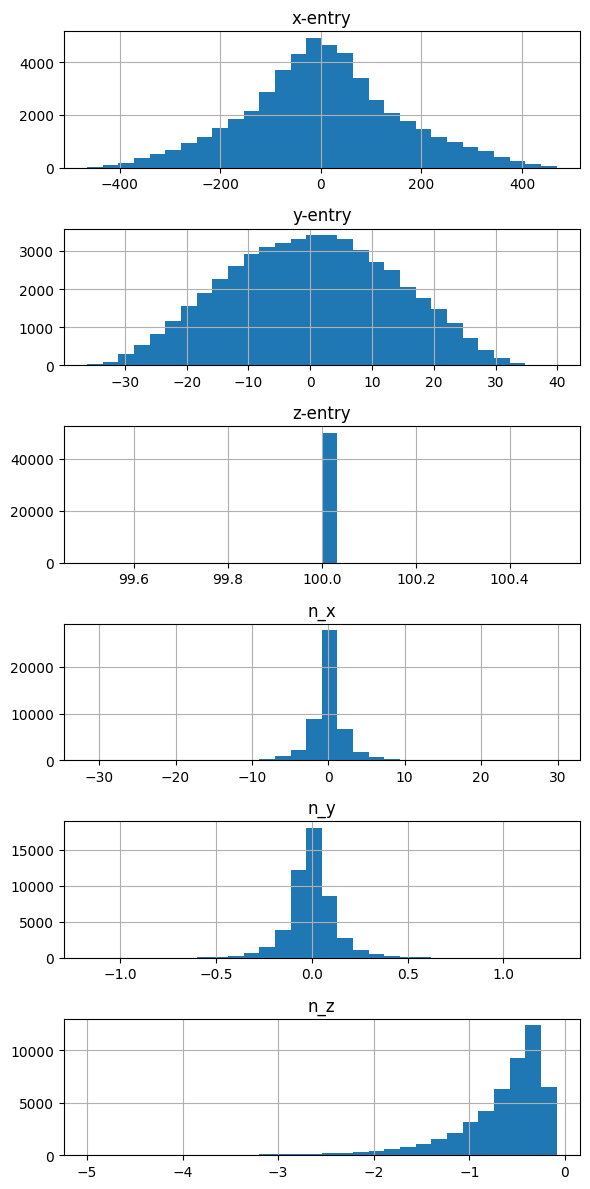


Random sample (up to 10 rows):
          x-entry    y-entry  z-entry       n_x       n_y       n_z  \
49026   -7.741579  10.715645    100.0  0.210936 -0.097794 -1.256561   
37674  156.238464 -28.630156    100.0 -1.174057  0.142503 -0.691508   
26186  -13.944872   2.609996    100.0  2.372407 -0.048440 -2.289107   
8676     3.041413 -13.863335    100.0  0.279633 -0.056367 -0.581635   
32918   12.629668   7.067056    100.0  0.118371  0.051669 -0.345787   
5986   -11.714274  -1.844071    100.0  1.056037  0.231180 -0.930339   
38705   58.960606  -3.868010    100.0 -0.579718 -0.030486 -0.281875   
391    -37.170574  -2.555773    100.0 -0.090781  0.021004 -0.230017   
6722   145.479477  11.328359    100.0 -0.716757 -0.014705 -0.380029   
20164  -67.861702  16.948524    100.0  2.356768 -0.275081 -3.502769   

       number_eh_pairs   y-local        pt  cotAlpha   cotBeta  y-midplane  \
49026           5769.0 -2.316920 -1.260310 -0.167868  0.077827    6.824310   
37674          24398.0  5.8827

In [3]:
labels_path = "datasets/labels/labels_d17301.parquet"

if not os.path.exists(labels_path):
    raise FileNotFoundError(f"Parquet file not found: {labels_path}")

# load parquet with same safe fallback pattern used earlier
try:
    labels_df = pd.read_parquet(labels_path)
except Exception:
    try:
        labels_df = pd.read_parquet(labels_path, engine="pyarrow")
    except Exception:
        labels_df = pd.read_parquet(labels_path, engine="fastparquet")

# Basic overview
print("Path:", labels_path)
print("Shape:", labels_df.shape)
print("\nColumns:")
print(labels_df.columns.tolist())
print("\nDtypes:")
print(labels_df.dtypes)
print("\nMemory usage (bytes):", labels_df.memory_usage(deep=True).sum())

# Peek
print("\nHead:")
print(labels_df.head(10))
print("\nTail:")
print(labels_df.tail(5))

# Info and summaries
print("\nInfo:")
labels_df.info(memory_usage="deep")
print("\nDescribe (numeric):")
print(labels_df.describe(include='number').transpose())
print("\nDescribe (all):")
print(labels_df.describe(include='all').transpose())

# Missing values and uniqueness
print("\nMissing values per column:")
print(labels_df.isnull().sum())
print("\nUnique counts per column:")
print(labels_df.nunique(dropna=False))

# Top value counts for object/category columns
lbl_obj_cols = [c for c, t in labels_df.dtypes.items() if t == "object" or str(t).startswith("category")]
for c in lbl_obj_cols:
    print(f"\nTop values for {c}:")
    print(labels_df[c].value_counts(dropna=False).head(20))

# Quick plots for numeric columns (limit a few to avoid overload)
lbl_num_cols = labels_df.select_dtypes(include=["number"]).columns.tolist()[:6]
if lbl_num_cols:
    ax_lbl = labels_df[lbl_num_cols].hist(layout=(len(lbl_num_cols), 1),
                                         figsize=(6, 2 * len(lbl_num_cols)),
                                         bins=30)
    plt.tight_layout()
    plt.show()

# Sample rows for inspection
print("\nRandom sample (up to 10 rows):")
print(labels_df.sample(min(10, len(labels_df)), random_state=1))

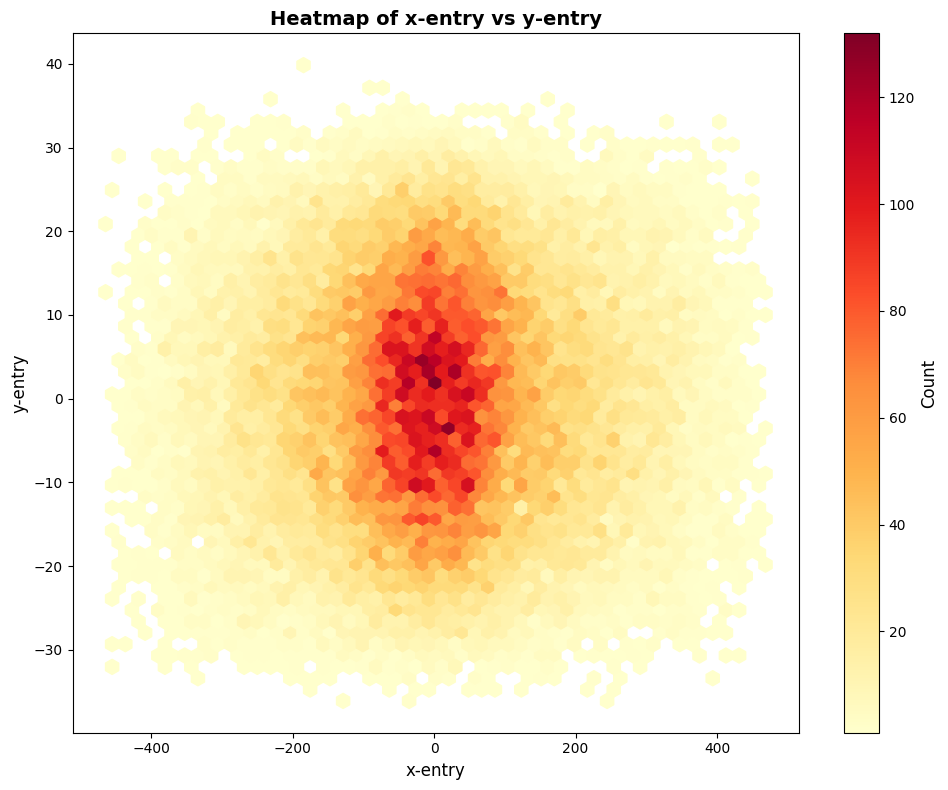

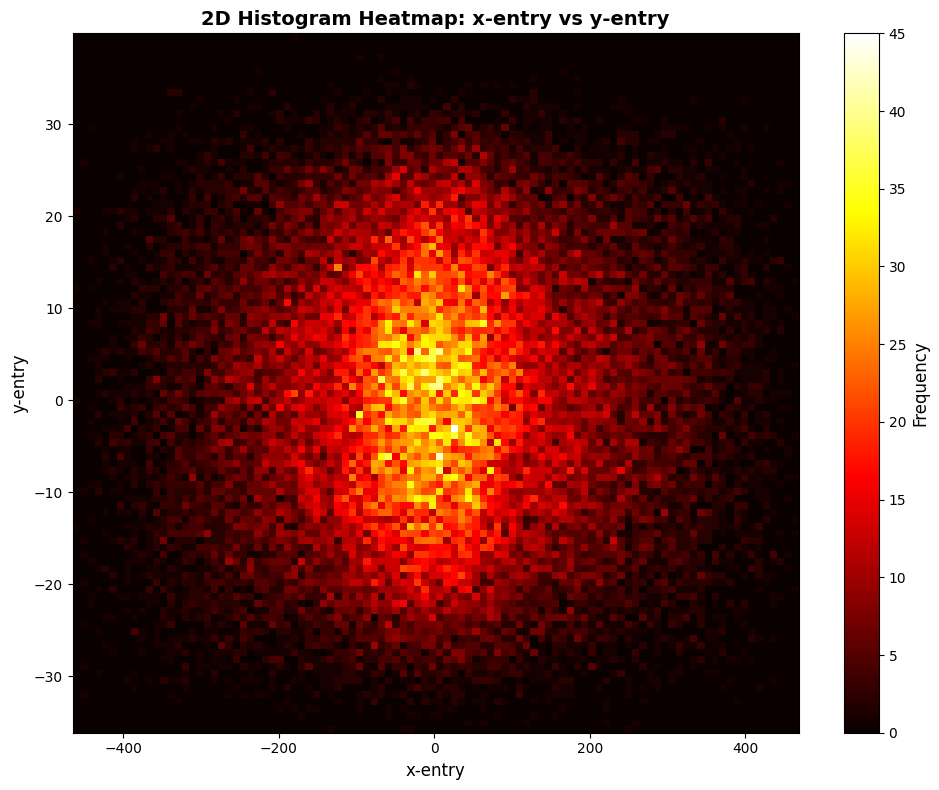


x-entry statistics:
count    49997.000000
mean         3.369366
std        153.547517
min       -464.938660
25%        -89.812233
50%          0.293260
75%         93.553703
max        468.594971
Name: x-entry, dtype: float64

y-entry statistics:
count    49997.000000
mean         0.160135
std         13.313612
min        -36.111237
25%         -9.705961
50%          0.254596
75%          9.959725
max         39.849751
Name: y-entry, dtype: float64

Correlation between x-entry and y-entry: 0.0090


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2D histogram (heatmap) for x-entry and y-entry
fig, ax = plt.subplots(figsize=(10, 8))

# Use hexbin for efficient 2D density plot
hb = ax.hexbin(labels_df['x-entry'], labels_df['y-entry'], 
               gridsize=50, cmap='YlOrRd', mincnt=1)

ax.set_xlabel('x-entry', fontsize=12)
ax.set_ylabel('y-entry', fontsize=12)
ax.set_title('Heatmap of x-entry vs y-entry', fontsize=14, fontweight='bold')

# Add colorbar
cb = plt.colorbar(hb, ax=ax)
cb.set_label('Count', fontsize=12)

plt.tight_layout()
plt.show()

# Alternative: 2D histogram with imshow
fig, ax = plt.subplots(figsize=(10, 8))

# Create 2D histogram
hist, xedges, yedges = np.histogram2d(
    labels_df['x-entry'], 
    labels_df['y-entry'], 
    bins=100
)

# Plot heatmap
im = ax.imshow(hist.T, origin='lower', aspect='auto', cmap='hot',
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

ax.set_xlabel('x-entry', fontsize=12)
ax.set_ylabel('y-entry', fontsize=12)
ax.set_title('2D Histogram Heatmap: x-entry vs y-entry', fontsize=14, fontweight='bold')

# Add colorbar
cb = plt.colorbar(im, ax=ax)
cb.set_label('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Print some statistics
print("\nx-entry statistics:")
print(labels_df['x-entry'].describe())
print("\ny-entry statistics:")
print(labels_df['y-entry'].describe())
print(f"\nCorrelation between x-entry and y-entry: {labels_df['x-entry'].corr(labels_df['y-entry']):.4f}")

Loading data...
x-entry                4.198420
y-entry               21.228418
z-entry              100.000000
n_x                    0.768970
n_y                   -0.160933
n_z                   -0.634940
number_eh_pairs    10570.000000
y-local               -6.941040
pt                     0.656019
cotAlpha              -1.211091
cotBeta                0.253462
y-midplane             8.555331
x-midplane            64.752961
Name: 0, dtype: float64


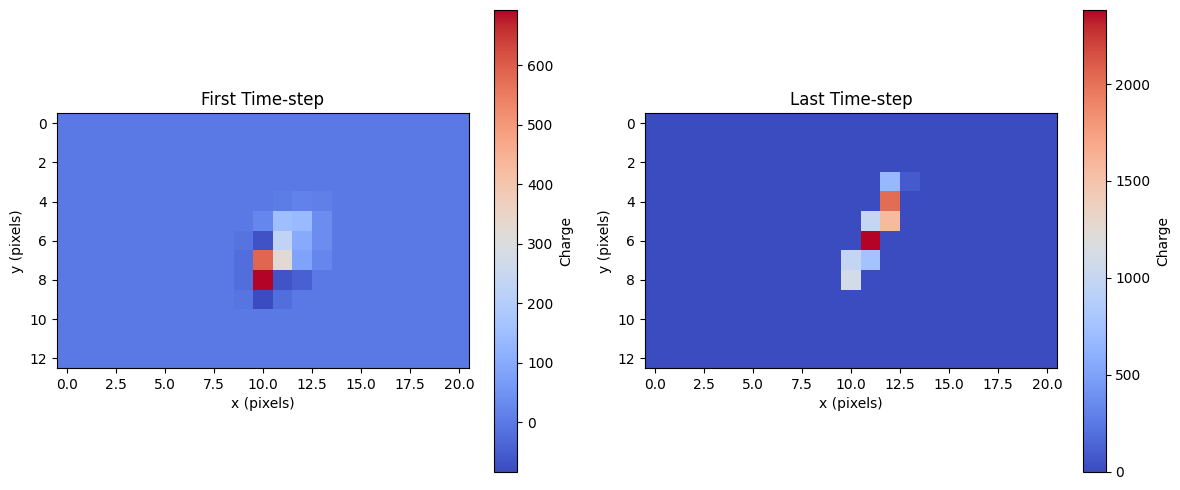

Figures saved in figures/ directory.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print("Loading data...")
dataX = pd.read_parquet("datasets/recon3D/recon3D_d17301.parquet")
labels_df = pd.read_parquet("datasets/labels/labels_d17301.parquet")
reshaped_dataX = dataX.values.reshape((len(dataX), 20, 13, 21))

os.makedirs("figures", exist_ok=True)

print(labels_df.iloc[0])

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First time-step
im1 = ax1.imshow(reshaped_dataX[0, 0, :, :], cmap='coolwarm')
ax1.set_title('First Time-step')
ax1.set_xlabel('x (pixels)')
ax1.set_ylabel('y (pixels)')
plt.colorbar(im1, ax=ax1, label='Charge')

# Last time-step
im2 = ax2.imshow(reshaped_dataX[0, -1, :, :], cmap='coolwarm')
ax2.set_title('Last Time-step')
ax2.set_xlabel('x (pixels)')
ax2.set_ylabel('y (pixels)')
plt.colorbar(im2, ax=ax2, label='Charge')

plt.tight_layout()
plt.savefig("figures/timestep_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("Figures saved in figures/ directory.")

Loading data...
x-entry                4.198420
y-entry               21.228418
z-entry              100.000000
n_x                    0.768970
n_y                   -0.160933
n_z                   -0.634940
number_eh_pairs    10570.000000
y-local               -6.941040
pt                     0.656019
cotAlpha              -1.211091
cotBeta                0.253462
y-midplane             8.555331
x-midplane            64.752961
Name: 0, dtype: float64


/tmp/ipykernel_12258/484082155.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 0.96])


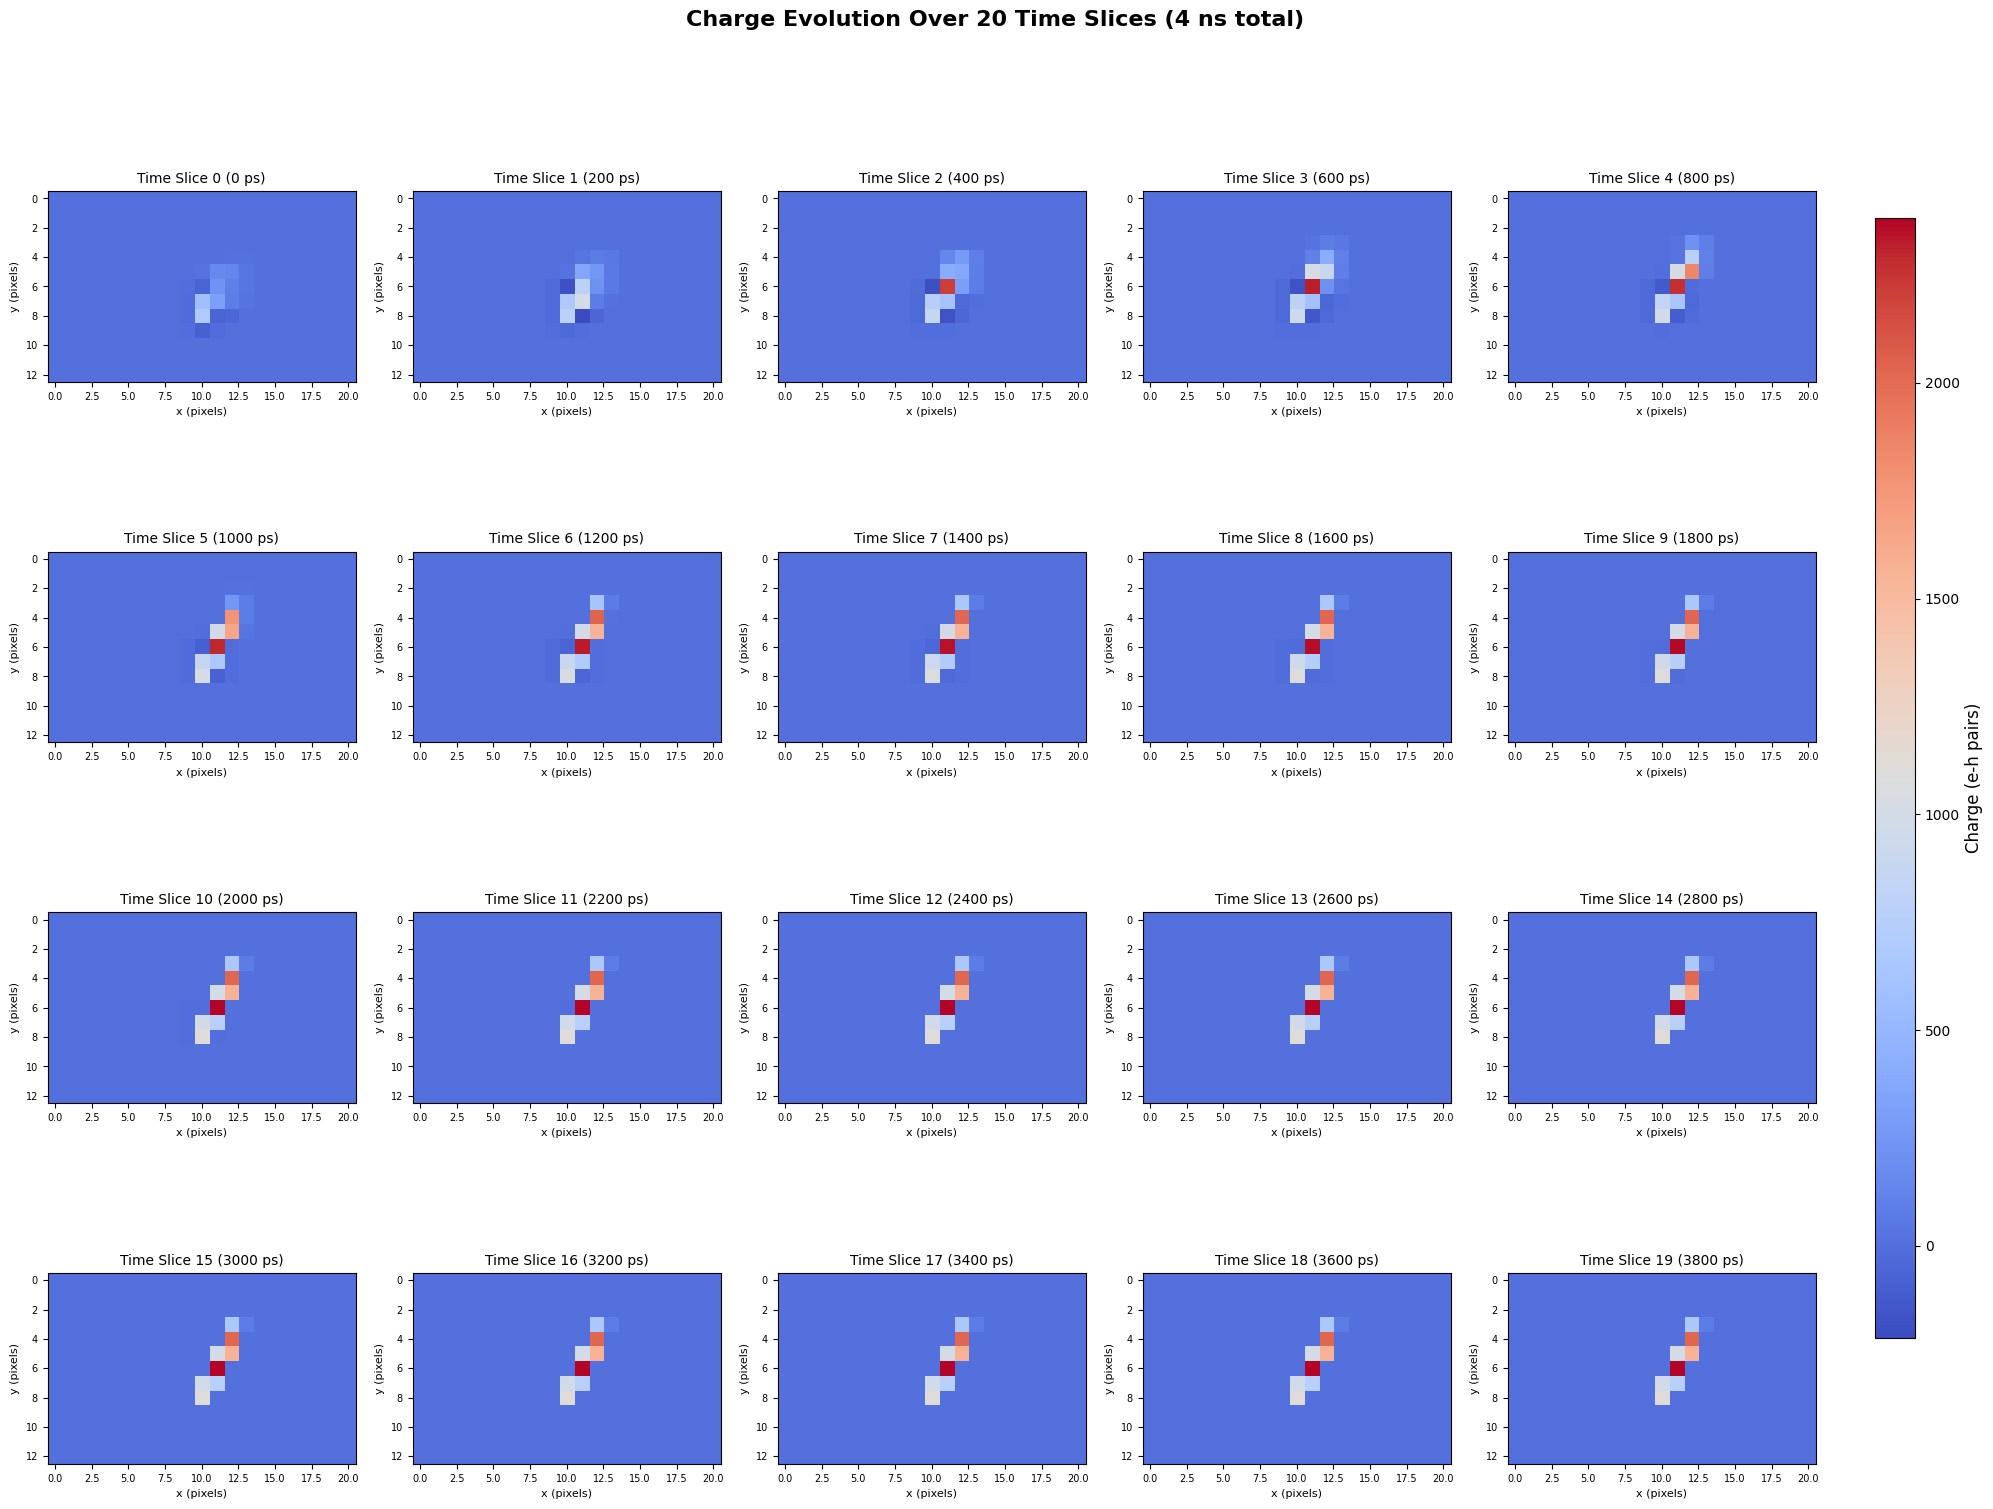

Figure saved in figures/all_timesteps.png


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

print("Loading data...")
dataX = pd.read_parquet("datasets/recon3D/recon3D_d17301.parquet")
labels_df = pd.read_parquet("datasets/labels/labels_d17301.parquet")
reshaped_dataX = dataX.values.reshape((len(dataX), 20, 13, 21))

os.makedirs("figures", exist_ok=True)

print(labels_df.iloc[0])

# Create figure with subplots for all 20 time slices
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

# Find global min/max for consistent color scale
vmin = reshaped_dataX[0, :, :, :].min()
vmax = reshaped_dataX[0, :, :, :].max()

# Plot each time slice
for t in range(20):
    im = axes[t].imshow(reshaped_dataX[0, t, :, :], cmap='coolwarm', vmin=vmin, vmax=vmax)
    axes[t].set_title(f'Time Slice {t} ({t*200} ps)', fontsize=10)
    axes[t].set_xlabel('x (pixels)', fontsize=8)
    axes[t].set_ylabel('y (pixels)', fontsize=8)
    axes[t].tick_params(labelsize=7)

# Add a shared colorbar
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Charge (e-h pairs)', fontsize=12)

plt.suptitle('Charge Evolution Over 20 Time Slices (4 ns total)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 0.92, 0.96])
plt.savefig("figures/all_timesteps.png", dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved in figures/all_timesteps.png")

## Visualizing Particle Direction Vectors

The direction vectors `(n_x, n_y, n_z)` represent the unit vector of the particle trajectory through the detector. Let's visualize them in multiple ways:

Direction vector magnitudes (should be ~1.0):
  Mean: 1.775941
  Std:  2.050793
  Min:  0.138396
  Max:  31.896700


/tmp/ipykernel_12258/1146050296.py:70: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(n_z)  # angle from z-axis


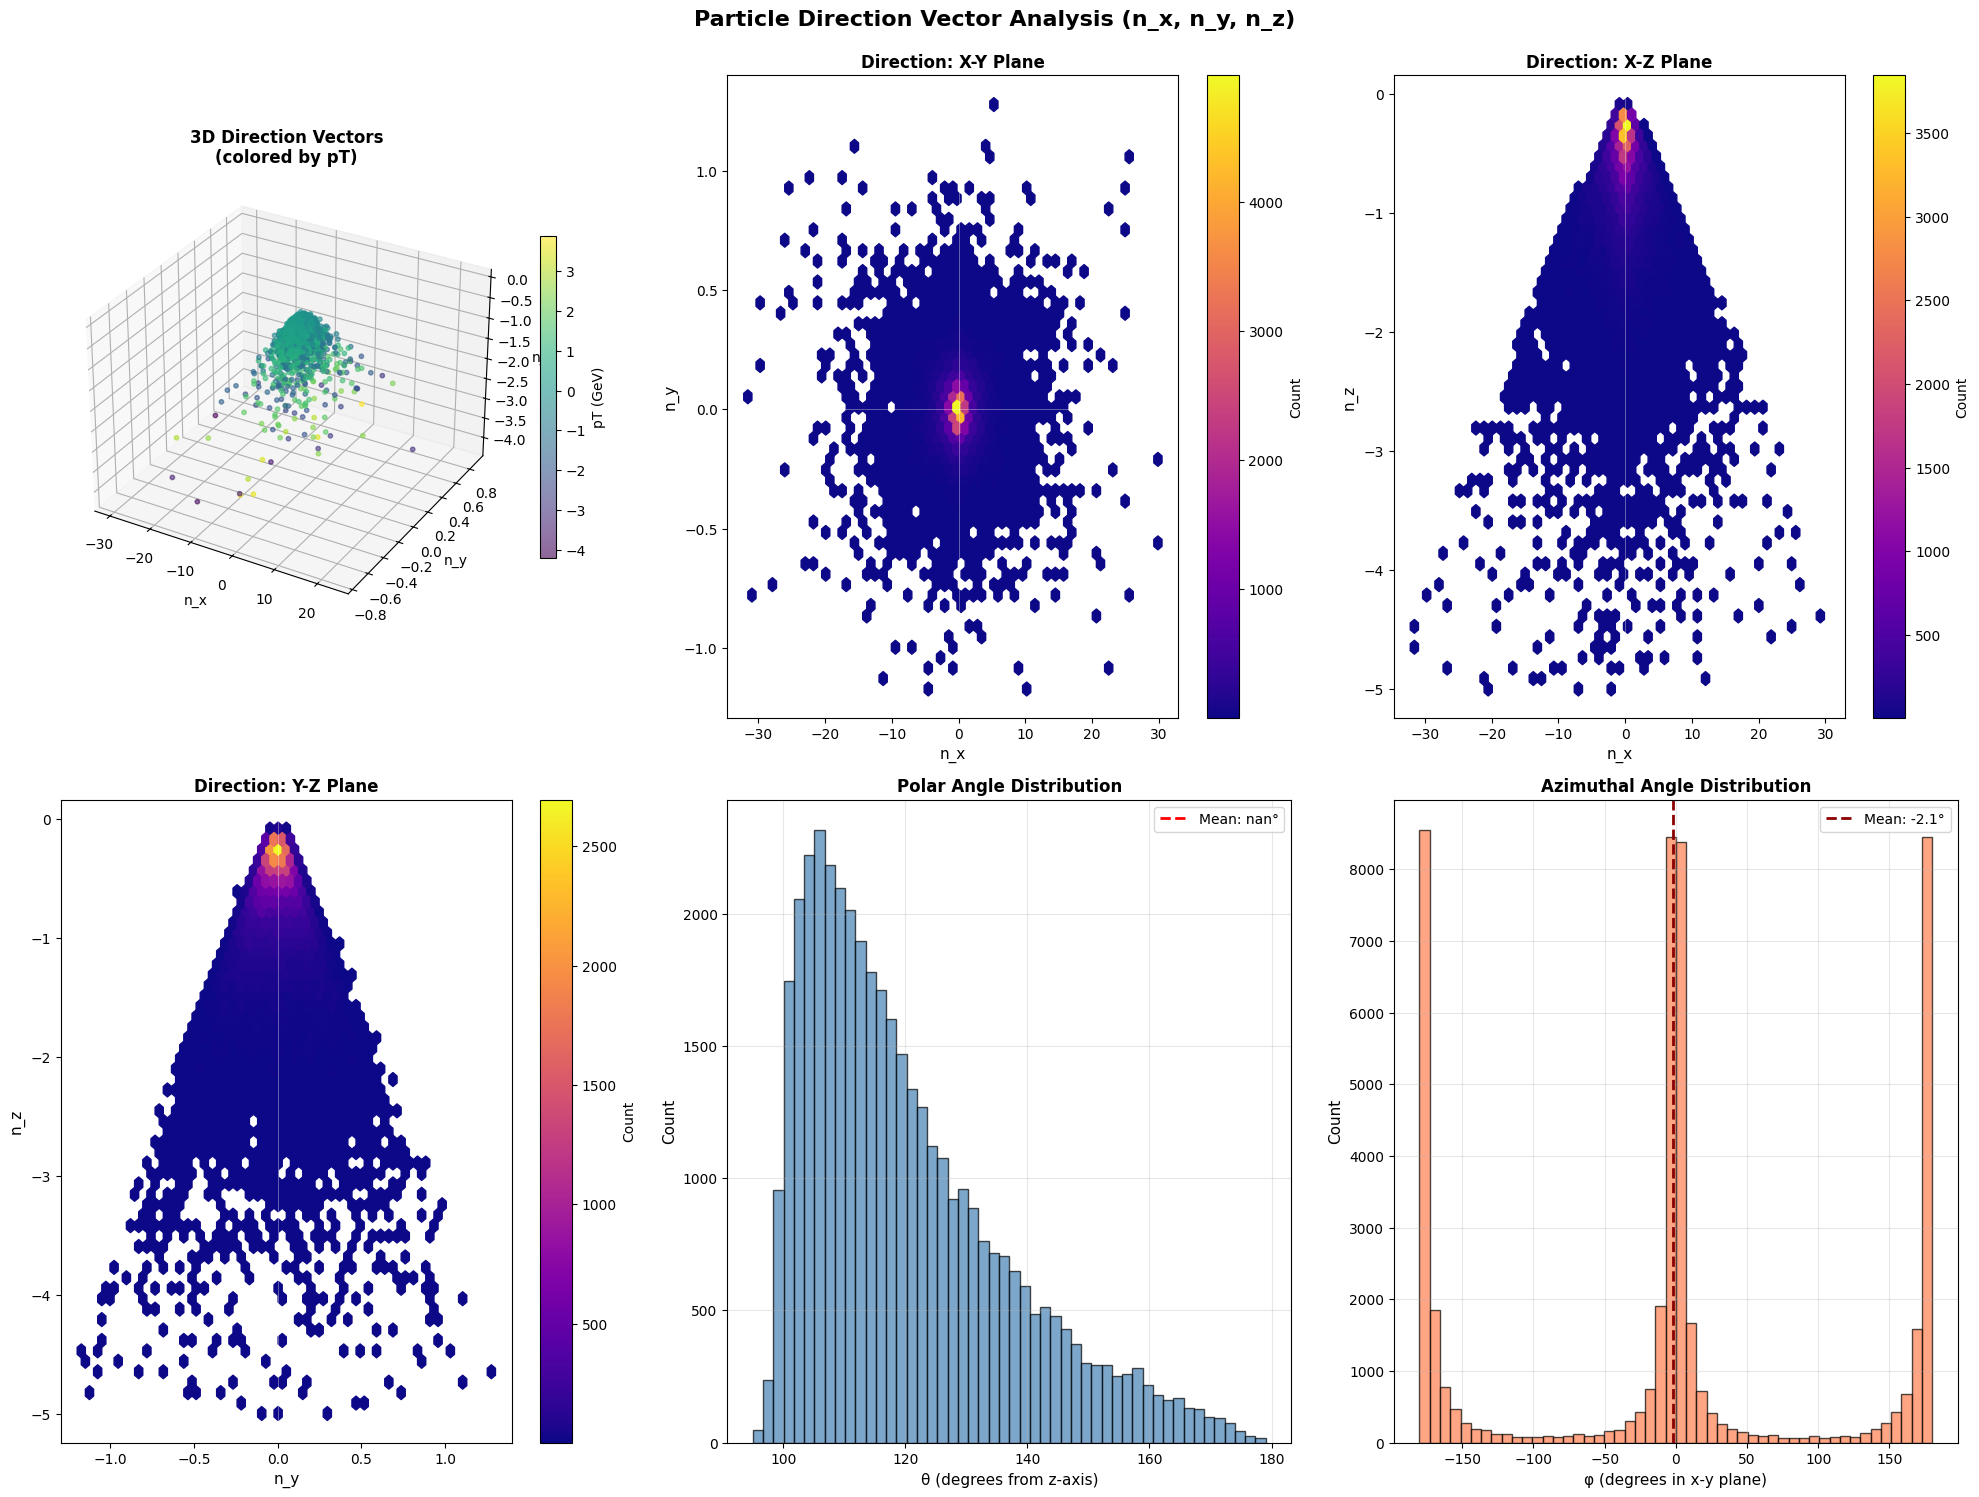


Direction vector statistics:
n_x: mean=-0.0452, std=2.5646, range=[-31.5774, 29.8655]
n_y: mean=-0.0016, std=0.1300, range=[-1.1724, 1.2770]
n_z: mean=-0.6841, std=0.5437, range=[-4.9984, -0.0881]

θ (polar): mean=nan°, std=nan°
φ (azimuthal): mean=-2.11°, std=121.66°


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load labels if not already loaded
labels_df = pd.read_parquet("datasets/labels/labels_d17301.parquet")

# Extract direction vectors
n_x = labels_df['n_x'].values
n_y = labels_df['n_y'].values
n_z = labels_df['n_z'].values

# Verify they are unit vectors
magnitudes = np.sqrt(n_x**2 + n_y**2 + n_z**2)
print(f"Direction vector magnitudes (should be ~1.0):")
print(f"  Mean: {magnitudes.mean():.6f}")
print(f"  Std:  {magnitudes.std():.6f}")
print(f"  Min:  {magnitudes.min():.6f}")
print(f"  Max:  {magnitudes.max():.6f}")

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 15))

# 1. 3D Scatter Plot of Direction Vectors (sample)
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
sample_size = 2000
sample_idx = np.random.choice(len(labels_df), sample_size, replace=False)
scatter = ax1.scatter(n_x[sample_idx], n_y[sample_idx], n_z[sample_idx], 
                     c=labels_df['pt'].iloc[sample_idx], cmap='viridis', 
                     alpha=0.6, s=10)
ax1.set_xlabel('n_x', fontsize=10)
ax1.set_ylabel('n_y', fontsize=10)
ax1.set_zlabel('n_z', fontsize=10)
ax1.set_title('3D Direction Vectors\n(colored by pT)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='pT (GeV)', shrink=0.5)

# 2. 2D projection: n_x vs n_y
ax2 = fig.add_subplot(2, 3, 2)
h2d_xy = ax2.hexbin(n_x, n_y, gridsize=50, cmap='plasma', mincnt=1)
ax2.set_xlabel('n_x', fontsize=11)
ax2.set_ylabel('n_y', fontsize=11)
ax2.set_title('Direction: X-Y Plane', fontsize=12, fontweight='bold')
ax2.axhline(0, color='white', linewidth=0.5, alpha=0.5)
ax2.axvline(0, color='white', linewidth=0.5, alpha=0.5)
plt.colorbar(h2d_xy, ax=ax2, label='Count')

# 3. 2D projection: n_x vs n_z
ax3 = fig.add_subplot(2, 3, 3)
h2d_xz = ax3.hexbin(n_x, n_z, gridsize=50, cmap='plasma', mincnt=1)
ax3.set_xlabel('n_x', fontsize=11)
ax3.set_ylabel('n_z', fontsize=11)
ax3.set_title('Direction: X-Z Plane', fontsize=12, fontweight='bold')
ax3.axhline(0, color='white', linewidth=0.5, alpha=0.5)
ax3.axvline(0, color='white', linewidth=0.5, alpha=0.5)
plt.colorbar(h2d_xz, ax=ax3, label='Count')

# 4. 2D projection: n_y vs n_z
ax4 = fig.add_subplot(2, 3, 4)
h2d_yz = ax4.hexbin(n_y, n_z, gridsize=50, cmap='plasma', mincnt=1)
ax4.set_xlabel('n_y', fontsize=11)
ax4.set_ylabel('n_z', fontsize=11)
ax4.set_title('Direction: Y-Z Plane', fontsize=12, fontweight='bold')
ax4.axhline(0, color='white', linewidth=0.5, alpha=0.5)
ax4.axvline(0, color='white', linewidth=0.5, alpha=0.5)
plt.colorbar(h2d_yz, ax=ax4, label='Count')

# 5. Polar/Spherical coordinates: theta (polar angle from z-axis)
ax5 = fig.add_subplot(2, 3, 5)
theta = np.arccos(n_z)  # angle from z-axis
theta_deg = np.degrees(theta)
ax5.hist(theta_deg, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax5.set_xlabel('θ (degrees from z-axis)', fontsize=11)
ax5.set_ylabel('Count', fontsize=11)
ax5.set_title('Polar Angle Distribution', fontsize=12, fontweight='bold')
ax5.axvline(theta_deg.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {theta_deg.mean():.1f}°')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Azimuthal angle phi (in x-y plane)
ax6 = fig.add_subplot(2, 3, 6)
phi = np.arctan2(n_y, n_x)  # azimuthal angle
phi_deg = np.degrees(phi)
ax6.hist(phi_deg, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax6.set_xlabel('φ (degrees in x-y plane)', fontsize=11)
ax6.set_ylabel('Count', fontsize=11)
ax6.set_title('Azimuthal Angle Distribution', fontsize=12, fontweight='bold')
ax6.axvline(phi_deg.mean(), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {phi_deg.mean():.1f}°')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.suptitle('Particle Direction Vector Analysis (n_x, n_y, n_z)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig("figures/direction_vectors_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nDirection vector statistics:")
print(f"n_x: mean={n_x.mean():.4f}, std={n_x.std():.4f}, range=[{n_x.min():.4f}, {n_x.max():.4f}]")
print(f"n_y: mean={n_y.mean():.4f}, std={n_y.std():.4f}, range=[{n_y.min():.4f}, {n_y.max():.4f}]")
print(f"n_z: mean={n_z.mean():.4f}, std={n_z.std():.4f}, range=[{n_z.min():.4f}, {n_z.max():.4f}]")
print(f"\nθ (polar): mean={theta_deg.mean():.2f}°, std={theta_deg.std():.2f}°")
print(f"φ (azimuthal): mean={phi_deg.mean():.2f}°, std={phi_deg.std():.2f}°")

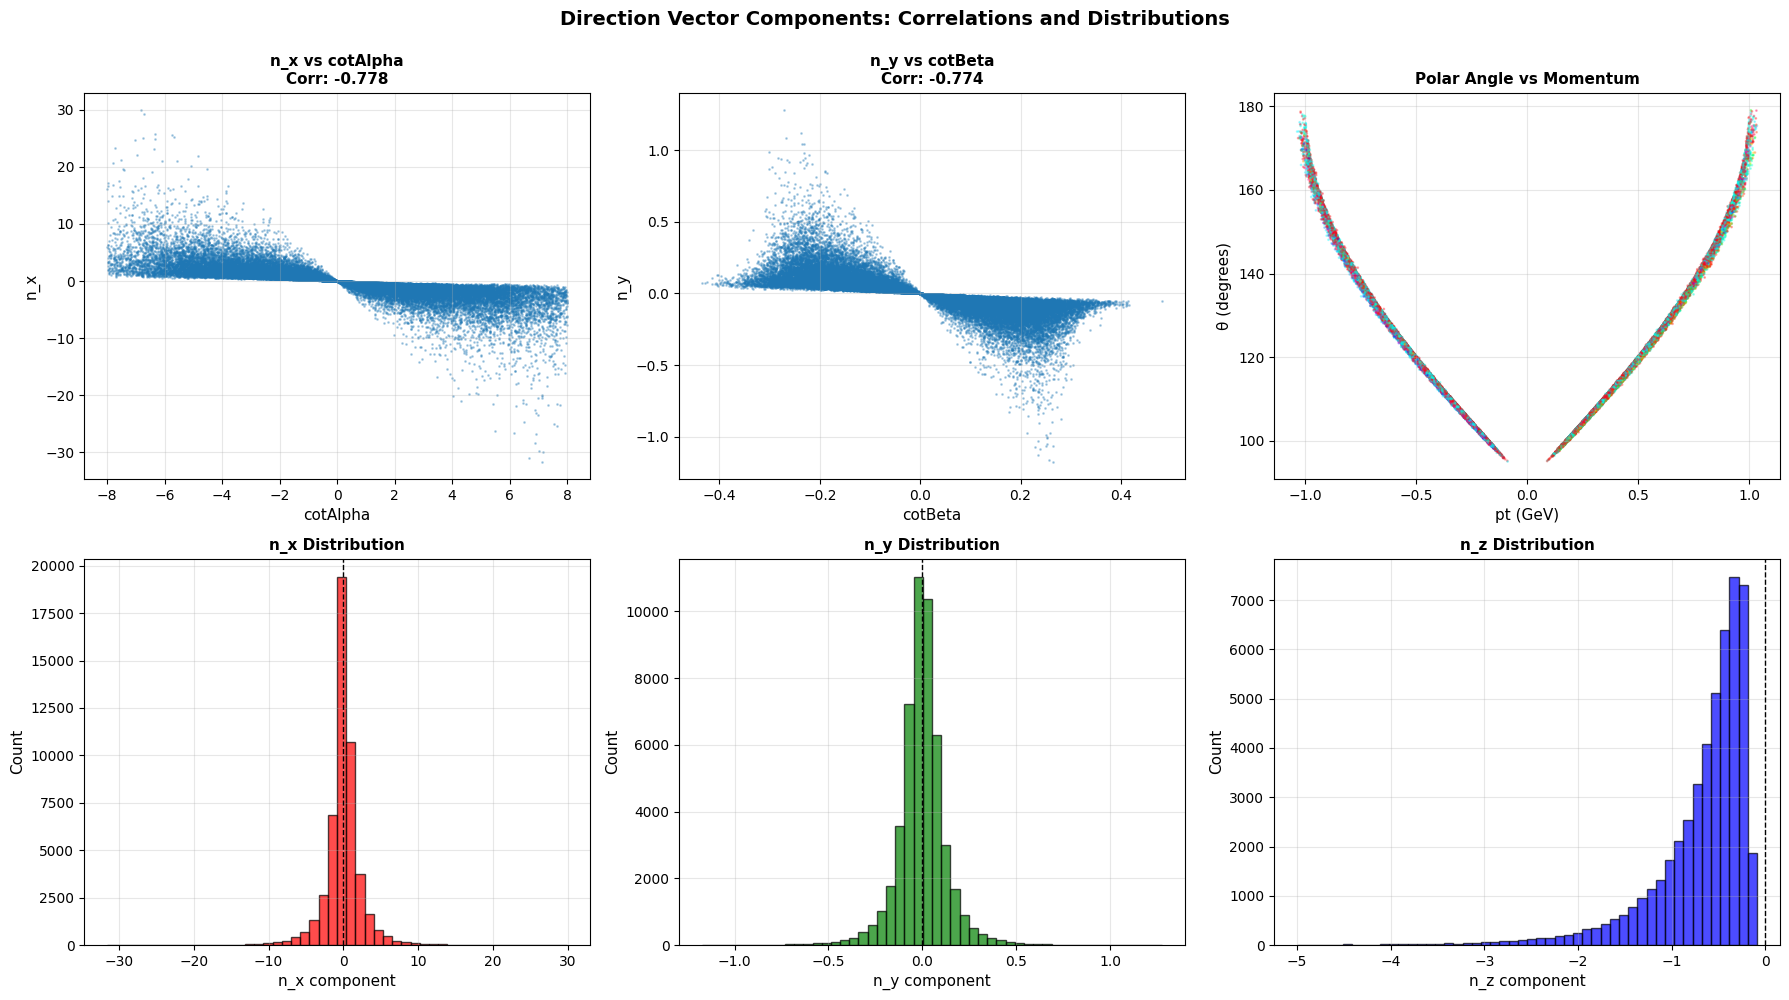


Correlations between direction and angle parameters:
n_x ↔ cotAlpha: -0.7784
n_y ↔ cotBeta:  -0.7735
n_z ↔ cotAlpha: 0.0010
n_z ↔ cotBeta:  0.0081


In [9]:
# Correlation between direction components and other physical quantities
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Relationship with cotAlpha and cotBeta (should be related to direction)
ax1 = axes[0, 0]
ax1.scatter(labels_df['cotAlpha'], labels_df['n_x'], alpha=0.3, s=1)
ax1.set_xlabel('cotAlpha', fontsize=11)
ax1.set_ylabel('n_x', fontsize=11)
ax1.set_title(f'n_x vs cotAlpha\nCorr: {labels_df["cotAlpha"].corr(labels_df["n_x"]):.3f}', 
              fontsize=11, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.scatter(labels_df['cotBeta'], labels_df['n_y'], alpha=0.3, s=1)
ax2.set_xlabel('cotBeta', fontsize=11)
ax2.set_ylabel('n_y', fontsize=11)
ax2.set_title(f'n_y vs cotBeta\nCorr: {labels_df["cotBeta"].corr(labels_df["n_y"]):.3f}', 
              fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Direction vs momentum
ax3 = axes[0, 2]
ax3.scatter(labels_df['pt'], theta_deg, alpha=0.3, s=1, c=phi_deg, cmap='hsv')
ax3.set_xlabel('pt (GeV)', fontsize=11)
ax3.set_ylabel('θ (degrees)', fontsize=11)
ax3.set_title('Polar Angle vs Momentum', fontsize=11, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Distribution of individual components
ax4 = axes[1, 0]
ax4.hist(n_x, bins=50, alpha=0.7, label='n_x', color='red', edgecolor='black')
ax4.set_xlabel('n_x component', fontsize=11)
ax4.set_ylabel('Count', fontsize=11)
ax4.set_title('n_x Distribution', fontsize=11, fontweight='bold')
ax4.axvline(0, color='black', linestyle='--', linewidth=1)
ax4.grid(True, alpha=0.3)

ax5 = axes[1, 1]
ax5.hist(n_y, bins=50, alpha=0.7, label='n_y', color='green', edgecolor='black')
ax5.set_xlabel('n_y component', fontsize=11)
ax5.set_ylabel('Count', fontsize=11)
ax5.set_title('n_y Distribution', fontsize=11, fontweight='bold')
ax5.axvline(0, color='black', linestyle='--', linewidth=1)
ax5.grid(True, alpha=0.3)

ax6 = axes[1, 2]
ax6.hist(n_z, bins=50, alpha=0.7, label='n_z', color='blue', edgecolor='black')
ax6.set_xlabel('n_z component', fontsize=11)
ax6.set_ylabel('Count', fontsize=11)
ax6.set_title('n_z Distribution', fontsize=11, fontweight='bold')
ax6.axvline(0, color='black', linestyle='--', linewidth=1)
ax6.grid(True, alpha=0.3)

plt.suptitle('Direction Vector Components: Correlations and Distributions', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig("figures/direction_correlations.png", dpi=300, bbox_inches='tight')
plt.show()

# Calculate and display correlations
print("\nCorrelations between direction and angle parameters:")
print(f"n_x ↔ cotAlpha: {labels_df['n_x'].corr(labels_df['cotAlpha']):.4f}")
print(f"n_y ↔ cotBeta:  {labels_df['n_y'].corr(labels_df['cotBeta']):.4f}")
print(f"n_z ↔ cotAlpha: {labels_df['n_z'].corr(labels_df['cotAlpha']):.4f}")
print(f"n_z ↔ cotBeta:  {labels_df['n_z'].corr(labels_df['cotBeta']):.4f}")

## 📋 Summary: Dataset Relationship for Machine Learning

### **Data Structure:**
- **recon3D dataset**: 49,997 rows with reconstructed 3D pixel/detector information (input features)
- **labels dataset**: 49,997 rows with particle truth properties (target labels)
- **Relationship**: Perfect 1-to-1 row correspondence (each row in recon3D maps to the same row in labels)

### **For Machine Learning Training:**

#### **Input Features (X)** - from `recon3D_d17xxx.parquet`:
The recon3D dataset contains the measured/reconstructed detector response data and being reshaped from a flat 2D DataFrame into a 4D array. This serves as your **input feature matrix**.

#### **Target Labels (Y)** - from `labels_d17xxx.parquet`:
The labels dataset contains the ground truth particle properties:
- `x-entry`, `y-entry`, `z-entry`: Entry point coordinates
- `n_x`, `n_y`, `n_z`: Direction vectors
- `number_eh_pairs`: Number of electron-hole pairs
- `y-local`, `pt`: Local y-coordinate and transverse momentum
- `cotAlpha`, `cotBeta`: Cotangent angles
- `x-midplane`, `y-midplane`: Midplane coordinates

### **ML Training Approach:**

```python
# Supervised learning paradigm
X = recon3D_data  # Input: reconstructed detector signals
Y = labels_data   # Output: true particle properties

# Training objective:
# Learn mapping f: X → Y where f(recon3D) ≈ labels
# This is a regression problem predicting continuous particle properties
```

### **Key Insights:**
1. ✅ **Direct row alignment** - no need for complex joins or matching
2. ✅ **Complete dataset** - no missing correspondences
3. ✅ **Multi-target regression** - predict multiple particle properties simultaneously
4. ✅ **Physics-informed learning** - reconstructing true particle properties from detector data

This is a classic **supervised learning** setup for particle physics reconstruction!

---

## 🔬 Dataset Summary: Silicon Pixel Detector Simulation

### **Physical Setup**
- **Detector:** 100 μm thick silicon pixel sensor
- **Pixel Array:** 21 × 13 pixels (x × y)
- **Pixel Pitch:** 50 μm (x) × 12.5 μm (y)
- **Magnetic Field:** 3.8 Tesla (parallel to x-axis)
- **Simulation:** Time-sliced PixelAV (charged pion interactions)
- **Particles:** π± from CMS Run 2 track kinematics

### **Dataset Files**

#### **📊 recon3D_d17xxx.parquet** (Input Features)
- **Shape:** (49,997 events, multiple features per pixel)
- **Content:** Deposited charge per pixel per time slice
- **Structure:** Reshapes to (time_slices, y, x) = (8, 13, 21)
  - 8 time slices × 200 ps = 1.6 ns measurement window
  - Each value = electron-hole pair charge at that pixel location
- **Purpose:** Detector response (what we measure)

#### **🎯 labels_d17xxx.parquet** (Ground Truth)
- **Shape:** (49,997 events, 13 truth properties)
- **Key Columns:**
  - **Position:** `x-entry`, `y-entry`, `z-entry` (surface), `x-midplane`, `y-midplane` (μm)
  - **Direction:** `n_x`, `n_y`, `n_z` (unit vector)
  - **Angles:** `cotAlpha` (x-z plane), `cotBeta` (y-z plane, magnetic bending)
  - **Momentum:** `pt` (GeV, sign = charge)
  - **Charge:** `number_eh_pairs` (total deposited)
  - **Geometry:** `y-local` (mm, module position)
- **Purpose:** True particle properties (what we want to predict)

### **Data Relationship**
```
recon3D[i] ←→ labels[i]    (1-to-1 row correspondence)
     ↓              ↓
  Measured    Ground Truth
   Signal     Properties
```

### **Machine Learning Task**
**Type:** Supervised multi-target regression

**Objective:** Learn mapping f: recon3D → labels
```python
Input:  3D charge cluster (y × x × time)
Output: [x-midplane, y-midplane, cotAlpha, cotBeta]
```

**Goal:** Reconstruct particle trajectory from detector signals
- Predict impact position at sensor midplane
- Predict angles of incidence
- Handle magnetic field bending effects

### **Physical Interpretation**
- **Charge Pattern** → Track trajectory through silicon
- **Cluster Width** → Particle incident angle
- **Time Evolution** → Charge drift and diffusion
- **Total Charge** → Energy deposition (dE/dx)

### **Dataset Quality**
- ✅ Files 16800+: Realistic p_T distribution
- ⚠️ Files <16800: Flattened low p_T (for balanced training)
- ✅ Complete 1-to-1 correspondence
- ✅ No missing values